In [1]:
!pip install imblearn

In [2]:
import imblearn
print(imblearn.__version__)
from itertools import *

# check scikit-learn version
import sklearn
print(sklearn.__version__)
import os

import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedShuffleSplit
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.datasets import make_classification

0.9.0
1.0.2


In [ ]:
...
# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
rfe.fit(X, y)
# transform the data
X, y = rfe.transform(X, y)

In [ ]:
# test classification dataset
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

# Data Reading

In [3]:
path = 'MachineLearningCSV'
all_files = glob.glob(path + "/*.csv")

df = pd.concat((pd.read_csv(f) for f in all_files))


#path = 'MachineLearningCSV'
#all_files = glob.glob(path + "/*.csv")

#df = pd.concat((pd.read_csv(f) for f in all_files))
#df = pd.read_csv('MachineLearningCSV.csv')

In [4]:
col_names = ["Destination_Port",
             "Flow_Duration", 
             "Total_Fwd_Packets",
             "Total_Backward_Packets",
             "Total_Length_of_Fwd_Packets", 
             "Total_Length_of_Bwd_Packets", 
             "Fwd_Packet_Length_Max", 
             "Fwd_Packet_Length_Min", 
             "Fwd_Packet_Length_Mean", 
             "Fwd_Packet_Length_Std",
             "Bwd_Packet_Length_Max", 
             "Bwd_Packet_Length_Min", 
             "Bwd_Packet_Length_Mean", 
             "Bwd_Packet_Length_Std",
             "Flow_Bytes_s", 
             "Flow_Packets_s", 
             "Flow_IAT_Mean", 
             "Flow_IAT_Std", 
             "Flow_IAT_Max", 
             "Flow_IAT_Min",
             "Fwd_IAT_Total", 
             "Fwd_IAT_Mean", 
             "Fwd_IAT_Std", 
             "Fwd_IAT_Max", 
             "Fwd_IAT_Min",
             "Bwd_IAT_Total", 
             "Bwd_IAT_Mean", 
             "Bwd_IAT_Std", 
             "Bwd_IAT_Max", 
             "Bwd_IAT_Min",
             "Fwd_PSH_Flags", 
             "Bwd_PSH_Flags", 
             "Fwd_URG_Flags", 
             "Bwd_URG_Flags", 
             "Fwd_Header_Length", 
             "Bwd_Header_Length",
             "Fwd_Packets_s", 
             "Bwd_Packets_s", 
             "Min_Packet_Length", 
             "Max_Packet_Length", 
             "Packet_Length_Mean", 
             "Packet_Length_Std", 
             "Packet_Length_Variance",
             "FIN_Flag_Count", 
             "SYN_Flag_Count", 
             "RST_Flag_Count", 
             "PSH_Flag_Count", 
             "ACK_Flag_Count", 
             "URG_Flag_Count", 
             "CWE_Flag_Count", 
             "ECE_Flag_Count", 
             "Down_Up_Ratio", 
             "Average_Packet_Size", 
             "Avg_Fwd_Segment_Size", 
             "Avg_Bwd_Segment_Size", 
             "Fwd_Header_Length",
             "Fwd_Avg_Bytes_Bulk", 
             "Fwd_Avg_Packets_Bulk", 
             "Fwd_Avg_Bulk_Rate", 
             "Bwd_Avg_Bytes_Bulk", 
             "Bwd_Avg_Packets_Bulk",
             "Bwd_Avg_Bulk_Rate",
             "Subflow_Fwd_Packets", 
             "Subflow_Fwd_Bytes", 
             "Subflow_Bwd_Packets", 
             "Subflow_Bwd_Bytes",
             "Init_Win_bytes_forward", 
             "Init_Win_bytes_backward", 
             "act_data_pkt_fwd", 
             "min_seg_size_forward",
             "Active_Mean", 
             "Active_Std", 
             "Active_Max", 
             "Active_Min",
             "Idle_Mean", 
             "Idle_Std", 
             "Idle_Max", 
             "Idle_Min", 
             "Label"
            ]

In [5]:
df.columns = col_names

In [6]:
df = df.sample(n=2000)

In [7]:
#df = df.sample(n=800000).reset_index(drop=True)

In [8]:
df.columns

Index(['Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count',
       'SYN_Flag_Co

In [9]:
#df.drop('Unnamed: 0', axis = 1)

In [10]:
df.head()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
58895,443,116379014,24,20,5001,5209,2957,0,208.3750,658.015582,...,32,1.075299e+05,2.419429e+05,837015,34407,10200000.0,5.687735e+04,10200000,10000000,BENIGN
326886,80,13979,2,1,12,0,6,6,6.0000,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,DoS Hulk
321750,53,157,2,2,86,118,43,43,43.0000,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
507572,44041,103386,2,1,12,6,6,6,6.0000,0.000000,...,20,0.000000e+00,0.000000e+00,0,0,0.0,0.000000e+00,0,0,BENIGN
60275,80,105662255,16,3,2541,6,231,0,158.8125,110.582831,...,32,4.707892e+06,6.657132e+06,9415196,589,19200000.0,1.880000e+07,51300000,5839373,DoS slowloris


In [11]:
def RForest_test(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X.sample(frac=0.02), y.sample(frac=0.02),test_size=0.2,random_state=0)
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train.values.reshape(-1,1), y_train)
    y_test_predict = clf.predict(X_test.values.reshape(-1,1))
    clf.score(X_test.values.reshape(-1,1),y_test)
    print(classification_report(y_test,y_test_predict))

# Data Cleaning

In [12]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()
df.isnull().any().any()

False

In [13]:
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'SQL'

In [14]:
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [15]:
df_FwdHeaderLength = df["Fwd_Header_Length"].iloc[:,0]
df.drop("Fwd_Header_Length",axis=1,inplace=True)
df["Fwd_Header_Length"]=df_FwdHeaderLength.values

In [16]:
df.duplicated(subset=None, keep='first')

58895     False
326886    False
321750    False
507572    False
60275     False
          ...  
403654    False
433680    False
70084     False
157682    False
40095     False
Length: 1999, dtype: bool

In [17]:
df.duplicated().sum()/len(df)

0.015507753876938469

In [18]:
# making a bool series
bool_series = df.duplicated()
 
# displaying data
df.head()
 
# display data
df[bool_series]

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Attack,Fwd_Header_Length
137820,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
172551,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
247088,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
297559,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
97777,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
96109,80,3,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
512667,443,3,2,0,12,0,6,6,6.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40
272418,80,4,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
303372,80,4,2,0,0,0,0,0,0.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,DoS Hulk,1,64
390539,443,3,2,0,12,0,6,6,6.0,0.000000,...,0.0,0,0,0.0,0.0,0,0,BENIGN,0,40


In [19]:
df.shape

(1999, 79)

In [20]:
df = df[~bool_series].reset_index(drop=True)

In [21]:
df.shape

(1968, 79)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1968 entries, 0 to 1967
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination_Port             1968 non-null   int64  
 1   Flow_Duration                1968 non-null   int64  
 2   Total_Fwd_Packets            1968 non-null   int64  
 3   Total_Backward_Packets       1968 non-null   int64  
 4   Total_Length_of_Fwd_Packets  1968 non-null   int64  
 5   Total_Length_of_Bwd_Packets  1968 non-null   int64  
 6   Fwd_Packet_Length_Max        1968 non-null   int64  
 7   Fwd_Packet_Length_Min        1968 non-null   int64  
 8   Fwd_Packet_Length_Mean       1968 non-null   float64
 9   Fwd_Packet_Length_Std        1968 non-null   float64
 10  Bwd_Packet_Length_Max        1968 non-null   int64  
 11  Bwd_Packet_Length_Min        1968 non-null   int64  
 12  Bwd_Packet_Length_Mean       1968 non-null   float64
 13  Bwd_Packet_Length_

In [23]:
#df = df[(df.Label != 'SQL')&(df.Label != 'Infiltration')&(df.Label != 'Heartbleed')].reset_index(drop=True)

In [24]:
def explore_unique_values_min(train_data, y_hat):
        
        muestra_fs = train_data
        one_value = []
        list_one_value = []
        list_individual_values = []
        drop_columns= []
        list_min_values = []
        
        for col in muestra_fs.columns:
            col_values = muestra_fs[col].value_counts()
            print('=======================', col, '=======================')
            print('Unique values {} percentage {} % '.format(muestra_fs[col].nunique(), (muestra_fs[col].nunique()/len(muestra_fs))*100))
            if (muestra_fs[col].nunique() <= 300):
                print(muestra_fs[col].unique() )
                print('Count_by_unique: ')
                print(muestra_fs[col].value_counts())
            else:
                print(muestra_fs[col].unique()[:5], '...')
            
            if(col == y_hat):            
                for i in range(0, len(muestra_fs[col].value_counts())):
                    print(col_values.index[i], col_values.iloc[i], (col_values.iloc[i] / len(muestra_fs[col]))*100)
                    if (col_values.iloc[i] < 21) | (((col_values.iloc[i] / len(muestra_fs[col]))*100)<0.01) :
                        print('unique labels to drop', col_values.index[i])
                        list_min_values.append(col_values.index[i])

            if (muestra_fs[col].nunique() == 1):
                one_value.append(col)
                one_value.append(muestra_fs[col].unique())

                drop_columns.append(col)
            if  ((muestra_fs[col].nunique()/len(muestra_fs))*100) == 100:
                list_individual_values.append(col)
                drop_columns.append(col)


        print("The columns with one value are: \n",one_value )      
        print("The columns with individual values are: \n",list_individual_values )   
        print("The total drop columns  are: \n", drop_columns )    
        
       
        return drop_columns, list_min_values

In [25]:
drop_col, list_min_drop = explore_unique_values_min(df, 'Label')

======================= Destination_Port =======================
Unique values 446 percentage 22.66260162601626 % 
[  443    80    53 44041   123] ...
======================= Flow_Duration =======================
Unique values 1489 percentage 75.66056910569105 % 
[116379014     13979       157    103386 105662255] ...
======================= Total_Fwd_Packets =======================
Unique values 50 percentage 2.540650406504065 % 
[ 24   2  16   1   8   3   6  14  15   4  20  13   7   5  19   9  29  21
  18  44  40  12  11  22  41  23  10  30  25  35  67 190  38  45  56  17
  26 159 108  28 126  33  39  34  27  36 938  47  68  83]
Count_by_unique: 
2      741
1      482
3      141
4      101
7       71
5       61
8       61
9       43
6       42
16      27
13      22
10      20
15      18
14      14
12      13
18      11
11      10
20      10
21       8
19       7
17       7
22       6
29       5
25       5
41       5
23       4
24       4
30       3
28       2
35       2
40       2
56

======================= Fwd_Packets_s =======================
Unique values 1558 percentage 79.16666666666666 % 
[2.06222747e-01 1.43071751e+02 1.27388535e+04 1.93449790e+01
 1.51425881e-01] ...
======================= Bwd_Packets_s =======================
Unique values 1408 percentage 71.54471544715447 % 
[1.71852289e-01 7.15358752e+01 1.27388535e+04 9.67248951e+00
 2.83923530e-02] ...
======================= Min_Packet_Length =======================
Unique values 66 percentage 3.353658536585366 % 
[  0  43   6  34  48  47  42  46  52  36  45 201  39  44  33  50  31  35
  95  32  51  74  40   2  28 178  30  53  41  61  86  58  37  54  49  29
  27  23  83  38  57  66  70  77  56  90  63  78  26  84  55  64  59  60
  79  76  75  62  91  68  80  67  71 174 163 289]
Count_by_unique: 
0      954
6      217
2       86
35      36
45      33
      ... 
70       1
68       1
67       1
62       1
289      1
Name: Min_Packet_Length, Length: 66, dtype: int64
======================= Max_Packet_Le

0.000000e+00    1829
2.718242e+06       1
6.150221e+05       1
2.854555e+05       1
6.965200e+05       1
                ... 
2.302191e+05       1
6.815714e+04       1
4.989982e+04       1
4.049140e+04       1
1.373757e+05       1
Name: Active_Std, Length: 140, dtype: int64
======================= Active_Max =======================
Unique values 349 percentage 17.733739837398375 % 
[ 837015       0 9415196  561616   16540] ...
======================= Active_Min =======================
Unique values 347 percentage 17.632113821138212 % 
[ 34407      0    589 115932  16540] ...
======================= Idle_Mean =======================
Unique values 281 percentage 14.278455284552846 % 
[1.02000000e+07 0.00000000e+00 1.92000000e+07 1.00000000e+07
 6.90000000e+07 9.82000000e+07 8.03000000e+07 9.99806736e+06
 9.78000000e+07 8.43000000e+07 9.70426317e+06 5.36398500e+06
 5.84000000e+07 9.84000000e+07 1.01000000e+08 9.16228250e+06
 5.52486400e+06 7.72822700e+06 1.00023868e+07 9.99703982e+06
 9.6

In [26]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'CWE_Flag_Count', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['SSH-Patator', 'FTP-Patator', 'DoS slowloris', 'DoS GoldenEye', 'Brute Force', 'DoS Slowhttptest']


In [27]:
df.shape

(1968, 79)

In [28]:
df.drop(drop_col, axis=1, inplace=True)

In [29]:
for drop_row in list_min_drop:
    df = df[df.Label != drop_row]

In [30]:
df.shape

(1930, 69)

# Preprocessing

In [31]:
def preprocessing_model(df):
    df.reset_index(drop = True, inplace = True)
    X = df.drop(['Label', 'Attack'],  axis=1)
    y = df['Label']
    y.unique()
    label_encoder = preprocessing.LabelEncoder()
    y = label_encoder.fit_transform(y)
    print(y)
    print(drop_col, list_min_drop)
    X.shape
    y.shape
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    oversample = SMOTE()
    X, y = oversample.fit_resample(X, y)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    y_aux = y.copy()
    y_aux['count_'] = 1
    y_aux.groupby(0).count()
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
    sss.get_n_splits(X, y)
    print(sss)
    for train_index, test_index in sss.split(X, y):
            print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
            y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]
    y_train_aux = y_train.copy()
    y_test_aux = y_test.copy()
    y_train_aux['count_'] = 1
    y_test_aux['count_'] = 1
    y_train_aux.groupby(0).count()
    y_test_aux.groupby(0).count()
    print(y_train, y_test)
    print(X_train.head())
    SS = StandardScaler()
    x_train_scaled = SS.fit_transform(X_train)
    x_test_scaled = SS.fit_transform(X_test)
    print(X_train.shape)
    print(X_test.shape)
    print(x_test_scaled.shape)
    pca =PCA(n_components=12) 
    x_train_pca=pca.fit_transform(x_train_scaled)
    x_test_pca=pca.fit_transform(x_test_scaled)
    print(x_train_pca.shape)
    print(x_test_pca.shape)
    return x_train_pca, x_test_pca

In [32]:
x_train_preprocess_model, x_test_preprocess_model = preprocessing_model(df)

[0 2 0 ... 0 0 0]
['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'CWE_Flag_Count', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['SSH-Patator', 'FTP-Patator', 'DoS slowloris', 'DoS GoldenEye', 'Brute Force', 'DoS Slowhttptest']
Counter({0: 1})
StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)
TRAIN: [1792 4274 2616 ...  245 5010 5168] TEST: [3752 1092 3573 3703 4177 2423 3947 2754 2010 4604 1385 5499 5097 6247
 5982 3750  207 1490 3679 1767 2553 2295 4189 1756 1784 1415 2649 5866
 3004 2201 4632 3086 5255  195 4269 6124 2140 6006 2339 3658 6085 6197
 3634 2806 4495  812 2681 2433 5420 1388 5075 2672  324 1231 1759 2184
  239 3429 2981  550 4000 3298 3097 5145 5599 3060 3044 4899 2101 3701
 4757 5592  134 2899 2445  846  660  355 1304 4265 1986 3763 5266 3230
 1171 1344 5790 6143 2260 4146 5828 2488 4312 5570 2194 4886  832 6356
 2470 5666 5598 2270

 3029 2472 4409 1490 4222 3415 1772  523 2082 2611]
TRAIN: [3603 5735  279 ... 3580 3487 1518] TEST: [1903 1758 1061 5993 4762  374 5696 5576 4942 5455 3800 2621 1607  134
 4874 4411 2789 6085 1863  286 4215 5103 4438  704 1117 6043   59 1721
 2859 5476 1192 1975 1732 4424 5036  210  586 5957 6317 3755 5366 2472
 6130 4371 3615 2222 2608 5485 3931 5020 4893 1530 3303 5144 1009 5940
 4073 2556 5024 5900 4799 2820 3456 5469 2504  744 3974 6019 6346 4998
  488 3155 1615 2899 2569 5588 5807 4274 3017 3158 2246 1435 1527 2418
  729 3630  332 4771 2423 4365 2571 5223 3659 5156 4842 4836  385 4732
 3764  803  634  422 2503 1510 5843 4930 2375 4570 5131  205 3162 2182
 4922 4063 4052 5466 5344  129 5494  696 5096 3941 2148 2199 2803 2103
 2554 1400 5650 3202  236 5626 1704 4070 5876 3967 5388 1576 3731 2229
 5387 4669  245 2742 5690 3545 1273 2268 4827 2304 5260 4241 3971 4594
  300 4109 3708 1896 2390 2636  733 3749  579 6390 1130 3027 3259 3716
 3293 2058 6407 5304 4347 2015 5579 3279  275 1

In [33]:
df.reset_index(drop = True, inplace = True)
X = df.drop(['Label', 'Attack'],  axis=1)
y = df['Label']

In [34]:
y.unique()

array(['BENIGN', 'DoS Hulk', 'PortScan', 'DDoS'], dtype=object)

In [35]:
#y = pd.get_dummies(y, prefix='Label')

In [36]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [37]:
print(y)

[0 2 0 ... 0 0 0]


In [38]:
#x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=0)

In [39]:
print(drop_col, list_min_drop)

['Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags', 'CWE_Flag_Count', 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate'] ['SSH-Patator', 'FTP-Patator', 'DoS slowloris', 'DoS GoldenEye', 'Brute Force', 'DoS Slowhttptest']


In [40]:
X.shape

(1930, 67)

In [41]:
y.shape

(1930,)

In [42]:
X = pd.DataFrame(X)

In [43]:
y = pd.DataFrame(y)

In [44]:
#df.to_csv('muestra_limpia_4_1_2022.csv')

In [45]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 1})


In [46]:
y_aux = y.copy()
y_aux['count_'] = 1

In [47]:
y_aux.groupby(0).count()

,count_
0,
0,1603
1,1603
2,1603
3,1603


In [48]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=0)
sss.get_n_splits(X, y)
print(sss)
for train_index, test_index in sss.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = y.loc[train_index,:], y.loc[test_index,:]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.15,
            train_size=None)
TRAIN: [1792 4274 2616 ...  245 5010 5168] TEST: [3752 1092 3573 3703 4177 2423 3947 2754 2010 4604 1385 5499 5097 6247
 5982 3750  207 1490 3679 1767 2553 2295 4189 1756 1784 1415 2649 5866
 3004 2201 4632 3086 5255  195 4269 6124 2140 6006 2339 3658 6085 6197
 3634 2806 4495  812 2681 2433 5420 1388 5075 2672  324 1231 1759 2184
  239 3429 2981  550 4000 3298 3097 5145 5599 3060 3044 4899 2101 3701
 4757 5592  134 2899 2445  846  660  355 1304 4265 1986 3763 5266 3230
 1171 1344 5790 6143 2260 4146 5828 2488 4312 5570 2194 4886  832 6356
 2470 5666 5598 2270 5289  617 5986 3955 4126 6261  448 1296 5552 4167
  881 6082 2927 3182  445  237 2151 2743 1762 3527 1724 5656 1043 2785
  180 2667  668 4773 1163 4071 5614 5430 3554 1902 3593  339 2594 5349
 5910 3617 4300  909 1032 5347 1945  947 1008 1143 4605 6037  791 4405
 2360 3608  722 3040  252 1102 3190 4517 1280 3756 6311 5933 2345 3733
   

In [49]:
y_train_aux = y_train.copy()
y_test_aux = y_test.copy()

In [50]:
y_train_aux['count_'] = 1
y_test_aux['count_'] = 1

In [51]:
y_train_aux.groupby(0).count()

,count_
0,
0,1363
1,1362
2,1363
3,1362


In [52]:
y_test_aux.groupby(0).count()

,count_
0,
0,240
1,241
2,240
3,241


In [53]:
print(y_train, y_test)

      0
3603  2
5735  3
279   0
1292  2
2276  1
...  ..
5052  3
2382  1
3580  2
3487  2
1518  0

[5450 rows x 1 columns]       0
1903  1
1758  3
1061  0
5993  3
4762  2
...  ..
3389  1
5038  3
4604  2
5603  3
5429  3

[962 rows x 1 columns]


In [54]:
print(X_train.head())

      Destination_Port  Flow_Duration  Total_Fwd_Packets  \
3603                80       85519261                  6   
5735              2492             73                  1   
279                 53            164                  2   
1292                80         206517                  3   
2276                80         244665                  3   

      Total_Backward_Packets  Total_Length_of_Fwd_Packets  \
3603                       7                          340   
5735                       1                            0   
279                        2                           46   
1292                       6                          365   
2276                       5                           26   

      Total_Length_of_Bwd_Packets  Fwd_Packet_Length_Max  \
3603                        11595                    322   
5735                            6                      0   
279                            46                     23   
1292                        1159

In [55]:
SS = StandardScaler()

In [56]:
x_train_scaled = SS.fit_transform(X_train)
x_test_scaled = SS.fit_transform(X_test)

In [57]:
'''
MMS = MinMaxScaler()
x_train_scaled = MMS.fit_transform(x_train_scaled)
x_test_scaled = MMS.fit_transform(x_test_scaled)
'''

'\nMMS = MinMaxScaler()\nx_train_scaled = MMS.fit_transform(x_train_scaled)\nx_test_scaled = MMS.fit_transform(x_test_scaled)\n'

In [58]:
print(X_train.shape)
print(X_test.shape)

(5450, 67)
(962, 67)


In [59]:
print(x_test_scaled.shape)

(962, 67)


In [60]:
pca =PCA(n_components=12) 
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.fit_transform(x_test_scaled)

In [61]:
print(x_train_pca.shape)
print(x_test_pca.shape)

(5450, 12)
(962, 12)


# Set_Model 

In [62]:
def set_model(x_train_pca, y_train, x_test_pca, y_test):
    model_classifier = MLPClassifier(random_state=1, max_iter=300)
    model_classifier.fit(x_train_pca,y_train)
    score_model=model_classifier.score(x_test_pca,y_test)
    score_model=round(score_model,4)*100
    print(score_model)
    return model_classifier

In [63]:
def set_model_cv():
    model_classifier = SVC(kernel='rbf',probability=True)
    return model_classifier

In [64]:
%%time
set_model(x_train_preprocess_model, y_train, x_test_preprocess_model, y_test)

C:\Users\nato9\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


19.02
Wall time: 17.2 s


MLPClassifier(max_iter=300, random_state=1)

In [65]:
%%time
model_classifier = SVC(kernel='rbf',probability=True)
model_classifier.fit(x_train_pca,y_train)

C:\Users\nato9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 3.85 s


SVC(probability=True)

In [66]:
score_model=model_classifier.score(x_test_pca,y_test)

In [67]:
score_model=round(score_model,4)*100

In [68]:
score_model

50.73

# Evaluate_Model

In [69]:
y_pred_svcpca=model_classifier.predict(x_test_pca)

In [70]:
y_pred_svcpca

array([2, 3, 0, 3, 0, 0, 3, 3, 3, 3, 2, 1, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 0, 1, 2, 0, 3, 1, 3, 1, 0, 3,
       3, 2, 2, 0, 0, 0, 3, 0, 3, 0, 1, 3, 2, 2, 0, 0, 0, 2, 0, 0, 1, 3,
       0, 3, 0, 3, 0, 0, 0, 2, 3, 3, 3, 1, 2, 2, 0, 0, 0, 0, 0, 3, 0, 1,
       0, 0, 0, 3, 0, 3, 2, 2, 0, 2, 0, 0, 0, 2, 3, 0, 3, 3, 2, 0, 0, 1,
       2, 0, 0, 2, 3, 3, 3, 0, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0,
       3, 2, 3, 2, 0, 0, 2, 0, 0, 2, 1, 3, 3, 0, 1, 2, 2, 2, 3, 0, 0, 0,
       0, 0, 3, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 3, 2, 0, 3, 1,
       0, 0, 0, 1, 0, 2, 1, 1, 3, 2, 0, 1, 3, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 3, 3, 3, 0, 0, 3, 0, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 0, 1, 0,
       0, 0, 3, 2, 3, 3, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 0, 3, 3,
       2, 0, 3, 1, 3, 0, 2, 3, 2, 1, 0, 0, 2, 0, 1, 2, 3, 0, 1, 2, 0, 2,
       2, 0, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 3, 0, 1, 0, 1, 2,
       0, 0, 0, 0, 3, 1, 0, 3, 2, 0, 2, 0, 1, 2, 3,

In [71]:
print(classification_report(y_test,y_pred_svcpca))

              precision    recall  f1-score   support

           0       0.43      0.75      0.54       240
           1       0.56      0.22      0.32       241
           2       0.53      0.52      0.53       240
           3       0.62      0.54      0.57       241

    accuracy                           0.51       962
   macro avg       0.53      0.51      0.49       962
weighted avg       0.53      0.51      0.49       962



In [72]:
print('Confusion Matrix RFE/MLP:')
con_svc_pca = confusion_matrix(y_test, y_pred_svcpca)
print(con_svc_pca)

La Matriz de confusión del modelo SVC + PCA:
[[180  27   8  25]
 [ 63  54 103  21]
 [ 67  15 125  33]
 [112   0   0 129]]


Text(30.5, 0.5, 'True')

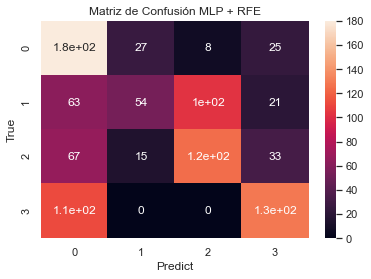

In [73]:
sns.set()
f,ax=plt.subplots()
sns.heatmap(con_svc_pca,annot=True,ax=ax)

ax.set_title('Confusion Matrix RFE/MLP:') 
ax.set_xlabel('Predict') 
ax.set_ylabel('True') 

In [74]:
y_pred_svcpca_vectorized=model_classifier.predict_proba(x_test_pca)#.argmax(axis=1)

In [75]:
y_test_vectorized = pd.get_dummies(y_test.astype(str), prefix='Label')

In [76]:
if y_test_vectorized.shape[1] < 2:    
    y_test_vectorized_aux = y_test_vectorized.copy()
    y_test_vectorized_aux['count_'] = 1
    y_test_vectorized_aux.groupby(0).count()

In [77]:
y_test_vectorized

,Label_0,Label_1,Label_2,Label_3
1903,0,1,0,0
1758,0,0,0,1
1061,1,0,0,0
5993,0,0,0,1
4762,0,0,1,0
...,...,...,...,...
3389,0,1,0,0
5038,0,0,0,1
4604,0,0,1,0
5603,0,0,0,1


In [78]:
y_pred_svcpca_vectorized.shape 

(962, 4)

In [79]:
y_test_vectorized.shape

(962, 4)

In [80]:
type(y_pred_svcpca_vectorized)

numpy.ndarray

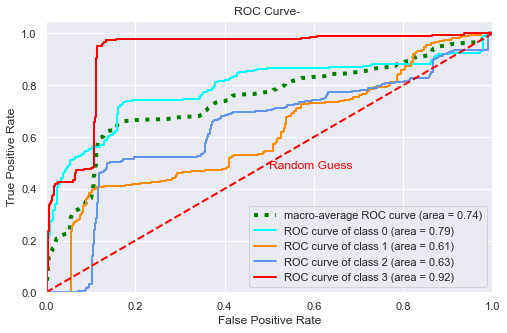

In [81]:
n_classes = y_test_vectorized.shape[1] 
pred1 = y_pred_svcpca_vectorized #          model.predict(x_test)
y_test_ = y_test_vectorized.values

t1 = sum(x == 0 for x in pred1 - y_test_) / len(pred1)

### MACRO
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_[:, i], pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

lw = 2
plt.figure(figsize=(8, 5))
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='green', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'lawngreen', 'crimson', 'darkviolet', 'mediumblue','darkorchid', 'forestgreen', 'darkcyan', 'skyblue', 'navy', 'seagreen', 'maroon'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i])) #0

plt.plot([0, 1], [0, 1], 'k--', color='red', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.annotate('Random Guess', (.5, .48), color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- ')
plt.legend(loc="lower right")
plt.show()
y = pd.get_dummies(y, prefix='Label')
#*****************************

# K-Fold Cross Validation 

In [82]:
def evaluate_model(cv, X, y):
	# get the model
	model = set_model_cv()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='f1-macro', cv=10, n_jobs=-1)
	# return scores
	return np.mean(scores), scores.min(), scores.max()

In [83]:
#mean_scores, min_scores, max_scores = evaluate_model(8, X, y)

In [84]:
#print(mean_scores, min_scores, max_scores)

In [ ]:

ideal, _, _ = evaluate_model(LeaveOneOut(), X, y)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,11) # fold = splits
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=False)#, random_state=0)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv, X, y)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)


In [ ]:

# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()


In [ ]:
MLPClassifier(random_state=1, max_iter=100)